In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

print(tf.__version__)

2.11.0


In [14]:
#loading dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [15]:
import numpy as np
x_train = np.float32(x_train/255.0)
x_test = np.float32(x_test/255.0)

##Exo3

In [16]:
#define network
model = keras.Sequential([
  keras.layers.Conv2D(32,kernel_size=3, activation='relu',kernel_initializer='he_uniform', padding = 'same', input_shape = (32, 32, 3)),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(pool_size= (2,2), strides=2),
  keras.layers.Dropout(0.2),
  keras.layers.Conv2D(64,kernel_size=3, padding = 'same', activation='relu', kernel_initializer='he_uniform'),
  keras.layers. BatchNormalization (),
  keras.layers.MaxPooling2D (pool_size = (2,2), strides= 2),
  keras.layers.Dropout (0.2),
  keras.layers.Conv2D(64, kernel_size= 3, padding = 'same', activation = 'relu', kernel_initializer='he_uniform'),
  keras.layers. BatchNormalization(),
  keras.layers.MaxPooling2D (pool_size = (2,2), strides= 2),
  keras.layers.Dropout (0.2), keras.layers. Flatten (),
  keras.layers.Dense(512, activation = 'relu', kernel_initializer='he_uniform'),
  keras.layers. BatchNormalization (), keras.layers.Dropout (0.2),
  keras.layers. Dense(10, activation = 'softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 64)       2

In [6]:
(3*3*3+1)*32

896

In [7]:
(3*3*64+1)*64

36928

In [8]:
4*4*64

1024

In [9]:
512*(1024+1)

524800

In [10]:
10*(512+1)

5130

In [18]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [19]:
es = EarlyStopping (monitor='val_accuracy', mode= 'auto', verbose=0, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])

##Exo6

In [20]:
#train the network with 20% validation
#history = model.fit(x_train, y_train, batch_size = 128, epochs=20, validation_split=0.2)
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=30000, batch_size=200, verbose=0, callbacks=[es, mc])
saved_model = load_model('best_model.h5')

KeyboardInterrupt: ignored

In [31]:
sgd = tf.keras.optimizers.SGD(
learning_rate=0.01, momentum=0.8, nesterov=False)
model.compile(optimizer=sgd, loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50,batch_size=200, verbose=0, callbacks=[es, mc])
saved_model = load_model ('best_model.h5')


Epoch 1: val_accuracy improved from -inf to 0.70070, saving model to best model.h5


KeyboardInterrupt: ignored

##Exo7

In [21]:
#test accuracy and loss
test_loss, test_acc = saved_model.evaluate(x_test, y_test, verbose=2)
print (test_loss, test_acc)

NameError: ignored

In [24]:
model = load_model('best_model.h5')

In [25]:
#test accuracy and loss
_, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
_, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train: %.4f, Test: %.4f' % (train_acc, test_acc))

Train: 0.8607, Test: 0.7596


##Exo8

In [26]:
predictions = saved_model.predict(x_test)
predictions[1]

print(np.argmax(predictions[1]))#predection
print(y_test[1])#true label
#recall cifar labels: airplane:0, automobile:1, bird:2, cat:3, deer:4, dog:5, frog:6, horse:7, ship:8, truck:9

313/313 [==============================] - 7s 23ms/step
8
[8]


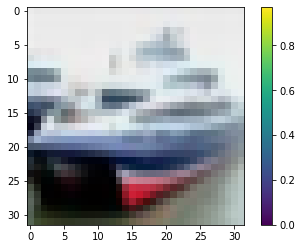

In [27]:
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Exo9

In [28]:
print(history.history.keys())
#print(saved_model.summary())

NameError: ignored

In [ ]:
plt.plot(history.history ['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy (fractional)')
plt. legend(['training accuracy', 'validation accuracy'], loc='best')

In [34]:
from tensorflow.keras import layers
inp = tf.keras.Input(shape=(32,32,3))

x = layers.Conv2D(16, (3,3),(2,2),kernel_initializer='he_uniform')(inp)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(32, (3,3),(2,2),kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.MaxPool2D(pool_size=(2,2))(x)
block1 = layers.Dropout(0.2)(x)

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(block1)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
block2 = layers.add([x, block1])

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(block2)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

x = layers.Conv2D(32, (3,3), padding="same",kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

block3 = layers.add([x, block2])

x = layers.GlobalAveragePooling2D()(block3)
x = layers.Dense(500, activation='relu',kernel_initializer='he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)
out = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inp, outputs=out)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=0,patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50,batch_size=200, verbose=0,callbacks=[es, mc])
saved_model = load_model('best_model.h5')


Epoch 1: val_accuracy improved from -inf to 0.25250, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.25250 to 0.44010, saving model to best_model.h5

Epoch 3: val_accuracy improved from 0.44010 to 0.48610, saving model to best_model.h5

Epoch 4: val_accuracy improved from 0.48610 to 0.51720, saving model to best_model.h5

Epoch 5: val_accuracy improved from 0.51720 to 0.52300, saving model to best_model.h5

Epoch 6: val_accuracy improved from 0.52300 to 0.53490, saving model to best_model.h5

Epoch 7: val_accuracy did not improve from 0.53490

Epoch 8: val_accuracy improved from 0.53490 to 0.55810, saving model to best_model.h5

Epoch 9: val_accuracy improved from 0.55810 to 0.55900, saving model to best_model.h5

Epoch 10: val_accuracy improved from 0.55900 to 0.56620, saving model to best_model.h5

Epoch 11: val_accuracy improved from 0.56620 to 0.57520, saving model to best_model.h5

Epoch 12: val_accuracy improved from 0.57520 to 0.58160, saving model to best_

In [2]:
import tensorflow as tf

In [3]:
#model.summary()
#import torchvision.models as models
from tensorflow.keras import layers

base_model = tf.keras.applications.DenseNet121(input_shape=(32,32,3),
                                               include_top=False,
                                               weights='imagenet')

29084464/29084464 [==============================] - 2s 0us/step


In [7]:
last = base_model.get_layer('conv5_block16_concat').output
x = layers.BatchNormalization()(last)
x = layers.Activation('relu')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(40, activation='relu')(x)
#x = tf.keras.layers.Dense(30, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(base_model.input, outputs)
#for layer in base_model.layers:
 #   layer.trainable = True

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [23]:
es = EarlyStopping(monitor='val_accuracy', mode='auto' , verbose=0, patience=20)
mc = ModelCheckpoint('best_model.h5' , monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50,batch_size=200, verbose=0, callbacks=[es, mc])
saved_model = load_model ('best_model.h5')


Epoch 1: val_accuracy improved from -inf to 0.77420, saving model to best_model.h5

Epoch 2: val_accuracy improved from 0.77420 to 0.79470, saving model to best_model.h5

Epoch 3: val_accuracy did not improve from 0.79470

Epoch 4: val_accuracy did not improve from 0.79470

Epoch 5: val_accuracy did not improve from 0.79470

Epoch 6: val_accuracy did not improve from 0.79470

Epoch 7: val_accuracy did not improve from 0.79470

Epoch 8: val_accuracy did not improve from 0.79470

Epoch 9: val_accuracy did not improve from 0.79470

Epoch 10: val_accuracy improved from 0.79470 to 0.79670, saving model to best_model.h5

Epoch 11: val_accuracy did not improve from 0.79670

Epoch 12: val_accuracy improved from 0.79670 to 0.79700, saving model to best_model.h5

Epoch 13: val_accuracy did not improve from 0.79700

Epoch 14: val_accuracy did not improve from 0.79700

Epoch 15: val_accuracy improved from 0.79700 to 0.80120, saving model to best_model.h5

Epoch 16: val_accuracy did not improve fr

In [24]:
sgd = tf.keras.optimizers.SGD(
learning_rate=0.01, momentum=0.8, nesterov=False)
model.compile(optimizer=sgd, loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50,batch_size=200, verbose=0, callbacks=[es, mc])
saved_model = load_model ('best_model.h5')


Epoch 1: val_accuracy did not improve from 0.80120

Epoch 2: val_accuracy did not improve from 0.80120

Epoch 3: val_accuracy did not improve from 0.80120

Epoch 4: val_accuracy did not improve from 0.80120

Epoch 5: val_accuracy did not improve from 0.80120

Epoch 6: val_accuracy did not improve from 0.80120

Epoch 7: val_accuracy did not improve from 0.80120

Epoch 8: val_accuracy did not improve from 0.80120

Epoch 9: val_accuracy did not improve from 0.80120

Epoch 10: val_accuracy did not improve from 0.80120

Epoch 11: val_accuracy did not improve from 0.80120

Epoch 12: val_accuracy did not improve from 0.80120

Epoch 13: val_accuracy did not improve from 0.80120

Epoch 14: val_accuracy did not improve from 0.80120

Epoch 15: val_accuracy improved from 0.80120 to 0.80360, saving model to best_model.h5

Epoch 16: val_accuracy did not improve from 0.80360

Epoch 17: val_accuracy did not improve from 0.80360

Epoch 18: val_accuracy did not improve from 0.80360

Epoch 19: val_accur